## Preprocessing

In [7]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [8]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [9]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    app_df['APPLICATION_TYPE'] = app_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
app_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [14]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 300].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)


In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [64]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 5)                 265       
                                                                 
 dense_30 (Dense)            (None, 20)                120       
                                                                 
 dense_31 (Dense)            (None, 1)                 21        
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [66]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [67]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 847us/step - loss: 0.5989 - accuracy: 0.6979
Epoch 2/100
804/804 [==============================] - 1s 841us/step - loss: 0.5704 - accuracy: 0.7207
Epoch 3/100
804/804 [==============================] - 1s 850us/step - loss: 0.5647 - accuracy: 0.7236
Epoch 4/100
804/804 [==============================] - 1s 843us/step - loss: 0.5624 - accuracy: 0.7246
Epoch 5/100
804/804 [==============================] - 1s 845us/step - loss: 0.5604 - accuracy: 0.7263
Epoch 6/100
804/804 [==============================] - 1s 876us/step - loss: 0.5595 - accuracy: 0.7254
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5587 - accuracy: 0.7265
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5577 - accuracy: 0.7266
Epoch 9/100
804/804 [==============================] - 1s 897us/step - loss: 0.5571 - accuracy: 0.7262
Epoch 10/100
804/804 [==============================] - 1s 891us/step - loss:

804/804 [==============================] - 1s 871us/step - loss: 0.5482 - accuracy: 0.7288
Epoch 81/100
804/804 [==============================] - 1s 845us/step - loss: 0.5481 - accuracy: 0.7303
Epoch 82/100
804/804 [==============================] - 1s 866us/step - loss: 0.5478 - accuracy: 0.7295
Epoch 83/100
804/804 [==============================] - 1s 918us/step - loss: 0.5478 - accuracy: 0.7303
Epoch 84/100
804/804 [==============================] - 1s 862us/step - loss: 0.5479 - accuracy: 0.7296
Epoch 85/100
804/804 [==============================] - 1s 866us/step - loss: 0.5478 - accuracy: 0.7296
Epoch 86/100
804/804 [==============================] - 1s 867us/step - loss: 0.5480 - accuracy: 0.7300
Epoch 87/100
804/804 [==============================] - 1s 866us/step - loss: 0.5478 - accuracy: 0.7300
Epoch 88/100
804/804 [==============================] - 1s 862us/step - loss: 0.5479 - accuracy: 0.7309
Epoch 89/100
804/804 [==============================] - 1s 866us/step - loss:

In [68]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5415 - accuracy: 0.7374 - 268ms/epoch - 1000us/step
Loss: 0.541549801826477, Accuracy: 0.7373760938644409


<AxesSubplot:>

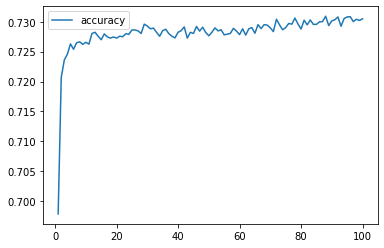

In [69]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [70]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity4.h5')

# Attempt 1

# Layers: 2 "relu"

# Attempt one: Model: "sequential"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
=================================================================
#  dense (Dense)               (None, 9)                 477       
                                                                 
#  dense_1 (Dense)             (None, 18)                180       
                                                                 
#  dense_2 (Dense)             (None, 1)                 19        
                                                                 
=================================================================
# Total params: 676
# Trainable params: 676
# Non-trainable params: 0

# 268/268 - 0s - loss: 0.5413 - accuracy: 0.7378 - 464ms/epoch - 2ms/step
# Loss: 0.5412667989730835, Accuracy: 0.7378425598144531

# ATTEMPT 2



# # Layers: 3 "relu"
# Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_3 (Dense)             (None, 9)                 477       
                                                                 
 dense_4 (Dense)             (None, 18)                180       
                                                                 
dense_5 (Dense)             (None, 25)                475       
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
=================================================================
#Total params: 1,158
#Trainable params: 1,158
 Non-trainable params: 0

268/268 - 1s - loss: 0.5442 - accuracy: 0.7366 - 1s/epoch - 4ms/step
Loss: 0.5441606044769287, Accuracy: 0.7365597486495972

# Attempt 3

# Layers: 4 "Tanh" 

# Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_24 (Dense)            (None, 5)                 265       
                                                                 
 dense_25 (Dense)            (None, 10)                60        
                                                                 
 dense_26 (Dense)            (None, 15)                165       
                                                                 
 dense_27 (Dense)            (None, 20)                320       
                                                                 
 dense_28 (Dense)            (None, 1)                 21        
                                                                 
=================================================================
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________

268/268 - 0s - loss: 0.5438 - accuracy: 0.7390 - 281ms/epoch - 1ms/step
Loss: 0.5438346266746521, Accuracy: 0.7390087246894836